<a id="1.1"></a>
<h2 style="font-family:arial;text-align:center; font-size: 40px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:black; background-color: #ffffff;"> <b>HDIP DATA ANALYTICS</b></h2>

<div style="padding:20px;color:black;margin:0;font-size:35px;font-family:arial;text-align:center;display:fill;border-radius:5px;background-color:lightblue;overflow:hidden"><b>MACHINE LEARNING FOR BUSINESS | SEM 2</b></div>

Lecturer(s): Dr. Muhammad Iqbal

Issue Date: 14th September 2023

Submission Deadline Date: 5th November 2023

Students: **_Bárbara Abreu Costa 2023099_** | **_Juliana Cristina da Cunha Brum 2023021_** 

GitHub Repository: https://github.com/JulianaCBrum/MACHINE-LEARNING-

-----

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:center;border-radius: 5px;overflow:hidden;font-weight:500">FLIGHT PRICE DICTIONARY</p>

|STT | ATTRIBUTE NAME | MEANING |
|:---| :--- |:--- |
| 0 | **date** | Day of the month and year 
| 1 | **airline** | Airline companies names. It is a categorical feature having 6 different airlines.
| 2 | **ch_code** | Airline company code. It is a categorical feature.
| 3 | **num_code** | Flight stores information regarding the plane's flight code. It is a categorical feature.
| 4 | **dep_time** |This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
| 5 | **from** | City from which the flight takes off. It is a categorical feature having 6 unique cities.
| 6 | **stop** | A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
| 7 | **arr_time** | Arrival Time. This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
| 8 | **to** | City where the flight will land. It is a categorical feature having 6 unique cities.
| 9 | **price** | Target variable stores information of the ticket price.

-----

> To start with our project, in the first code we are importing some libraries to work with such as: pandas, seaborn, matplotlib and numpy.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

> The next 2 codes are to read the dataset (which one we are calling df) and geting its first 5 rows, in order to understand the data.

In [2]:
df = pd.read_csv('business.csv')

In [3]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,23:55,Mumbai,"46,690"


> The code df.shape is to see the number of rows and columns in the dataset. In this case, we have 93487 rows and 11 columns.

In [4]:
df.shape

(93487, 11)

> The code df.info is to check information about the dataset such as: name of columns, data type, if it has missing values, ect. In this case, we have 11 columns, only one of them has integer values, the others 10 are object. So, to apply machine learning, we have to make some transformation in this data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [6]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

> To ensure data quality and avoid misleading or redundant information, I'll dropping duplicate rows 

(180 words)

In [7]:
df.duplicated().sum()

0

> Some columns are irrelevant for our analysis, so we are going to drop them using the next code. As we are modifying the dataset, we are going to change its name. Now it is df1.

In [8]:
df1 = df.drop(['ch_code', 'num_code', 'dep_time', 'stop', 'arr_time'], axis=1)
df1.head()

,date,airline,from,time_taken,to,price
0,11-02-2022,Air India,Delhi,02h 00m,Mumbai,"25,612"
1,11-02-2022,Air India,Delhi,02h 15m,Mumbai,"25,612"
2,11-02-2022,Air India,Delhi,24h 45m,Mumbai,"42,220"
3,11-02-2022,Air India,Delhi,26h 30m,Mumbai,"44,450"
4,11-02-2022,Air India,Delhi,06h 40m,Mumbai,"46,690"


> As the price column has object values, to apply Machine Learning models and make plots, we need to replace it as integers values. The below is to do that.

In [9]:

df1['price'] = df1['price'].str.replace(',', '').astype(float)


df1.head()

,date,airline,from,time_taken,to,price
0,11-02-2022,Air India,Delhi,02h 00m,Mumbai,25612.0
1,11-02-2022,Air India,Delhi,02h 15m,Mumbai,25612.0
2,11-02-2022,Air India,Delhi,24h 45m,Mumbai,42220.0
3,11-02-2022,Air India,Delhi,26h 30m,Mumbai,44450.0
4,11-02-2022,Air India,Delhi,06h 40m,Mumbai,46690.0


> As the dataset has a wide number of rows with information for the same days, to perform Time Series models we have to resample the data. So, we will use the code groupby (below), to aggregate all rows which have the same day's data and use the mean value of them to create a single row for each day in the dataset. This process is called downsampling.

>The new dataset is called df1_daily_mean.

In [10]:
df1['date'] = pd.to_datetime(df1['date'])

df1_daily_mean = df1.groupby(df1['date'].dt.date)['price'].mean()

df1_daily_mean

C:\Users\jujub\AppData\Local\Temp\ipykernel_16048\1976572297.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['date'] = pd.to_datetime(df1['date'])


date
2022-01-03    52113.802120
2022-02-03    52384.847236
2022-02-13    60313.822331
2022-02-14    56120.287087
2022-02-15    56149.915397
2022-02-16    53643.310488
2022-02-17    54501.171604
2022-02-18    53224.650386
2022-02-19    52981.195297
2022-02-20    54247.303856
2022-02-21    51845.794695
2022-02-22    51991.619675
2022-02-23    52172.086514
2022-02-24    52441.797235
2022-02-25    52374.451431
2022-02-26    52063.309830
2022-02-27    52824.242843
2022-02-28    52334.639336
2022-03-03    51919.704211
2022-03-13    52360.828629
2022-03-14    51264.440488
2022-03-15    51810.985112
2022-03-16    51869.054609
2022-03-17    51475.459162
2022-03-18    51924.139056
2022-03-19    51808.754280
2022-03-20    52150.719697
2022-03-21    51214.290386
2022-03-22    51406.713790
2022-03-23    52153.949178
2022-03-24    51583.182456
2022-03-25    52092.968703
2022-03-26    51383.279592
2022-03-27    51160.208098
2022-03-28    51209.790072
2022-03-29    51742.102235
2022-03-30    51558.758

In [11]:
df1_daily_mean = df1_daily_mean.reset_index()

In [12]:
df1_daily_mean['date'] = pd.to_datetime(df1_daily_mean['date'])

> Once we have the dataset with the mean price for the days, we have to merge it with the previous dataset. Now we have: price_x (original) and price_y (mean for each day). The name of the dataset has changed for merged_df.

In [13]:
merged_df = pd.merge(df1, df1_daily_mean, on='date', how='left')

merged_df.head()

,date,airline,from,time_taken,to,price_x,price_y
0,2022-11-02,Air India,Delhi,02h 00m,Mumbai,25612.0,65169.31203
1,2022-11-02,Air India,Delhi,02h 15m,Mumbai,25612.0,65169.31203
2,2022-11-02,Air India,Delhi,24h 45m,Mumbai,42220.0,65169.31203
3,2022-11-02,Air India,Delhi,26h 30m,Mumbai,44450.0,65169.31203
4,2022-11-02,Air India,Delhi,06h 40m,Mumbai,46690.0,65169.31203


> As it has been merged already we only need one row for day in the dataset. So, the code below is to get that.

In [14]:
grouped_df = merged_df.groupby('date').agg({'airline': 'first', 'from': 'first', 'time_taken': 'first', 'to': 'first', 'price_x': 'mean', 'price_y': 'mean'})
grouped_df = grouped_df.reset_index()
grouped_df.head()

,date,airline,from,time_taken,to,price_x,price_y
0,2022-01-03,Vistara,Delhi,02h 10m,Mumbai,52113.802120,52113.802120
1,2022-02-03,Vistara,Delhi,02h 10m,Mumbai,52384.847236,52384.847236
2,2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331,60313.822331
3,2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087,56120.287087
4,2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397,56149.915397


> We do not need two columns with the same information (price_y and price_x). So we are dropping price_y and only keeping price_x.

In [15]:
grouped_df.drop('price_y', axis=1, inplace=True)
grouped_df.head(50)

,date,airline,from,time_taken,to,price_x
0,2022-01-03,Vistara,Delhi,02h 10m,Mumbai,52113.802120
1,2022-02-03,Vistara,Delhi,02h 10m,Mumbai,52384.847236
2,2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331
3,2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087
4,2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397
5,2022-02-16,Vistara,Delhi,02h 10m,Mumbai,53643.310488
6,2022-02-17,Air India,Delhi,02h 00m,Mumbai,54501.171604
7,2022-02-18,Vistara,Delhi,02h 10m,Mumbai,53224.650386
8,2022-02-19,Vistara,Delhi,02h 10m,Mumbai,52981.195297
9,2022-02-20,Vistara,Delhi,02h 10m,Mumbai,54247.303856


> This dataset, after prepared for Time Series, has only one row of data in the months: January, April, May, June, July, August, September and October. And two rows of data in November and December of 2022.
> 
> So, we are going to drop those rows and only work with the months February and March.
> 
> The dataset now, is called df_timeseries.

In [16]:
grouped_df['date'] = pd.to_datetime(grouped_df['date'])

grouped_df = grouped_df[(grouped_df['date'].dt.month == 2) | (grouped_df['date'].dt.month == 3)]

df_timeseries = grouped_df.reset_index(drop=True)

df_timeseries.head()

,date,airline,from,time_taken,to,price_x
0,2022-02-03,Vistara,Delhi,02h 10m,Mumbai,52384.847236
1,2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331
2,2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087
3,2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397
4,2022-02-16,Vistara,Delhi,02h 10m,Mumbai,53643.310488


> In order to apply Time Series is necessary to change the index of the dataset, and replace it with the date. We are using the code set_index to do that.


In [17]:
df_timeseries['date'] = pd.to_datetime(df_timeseries['date'])

df_timeseries.set_index('date', inplace=True)

df_timeseries.head(50)

,airline,from,time_taken,to,price_x
date,,,,,
2022-02-03,Vistara,Delhi,02h 10m,Mumbai,52384.847236
2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331
2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087
2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397
2022-02-16,Vistara,Delhi,02h 10m,Mumbai,53643.310488
2022-02-17,Air India,Delhi,02h 00m,Mumbai,54501.171604
2022-02-18,Vistara,Delhi,02h 10m,Mumbai,53224.650386
2022-02-19,Vistara,Delhi,02h 10m,Mumbai,52981.195297
2022-02-20,Vistara,Delhi,02h 10m,Mumbai,54247.303856


> ### Time Series 

> Ploting the data, to see how it looks like

<Axes: xlabel='date'>

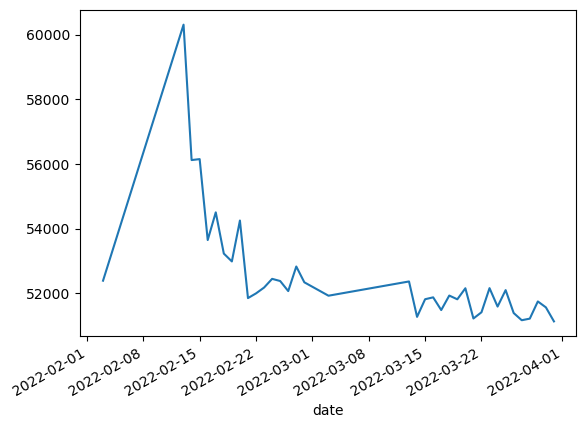

In [18]:
df_timeseries['price_x'].plot()

<Figure size 1400x800 with 0 Axes>

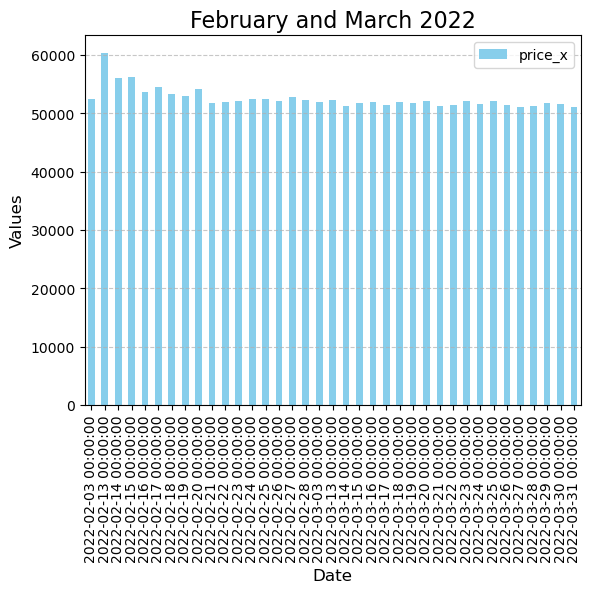

In [19]:

df_feb_mar_2022 = df_timeseries['2022-02':'2022-03']

plt.figure(figsize=(14, 8))  
df_feb_mar_2022.plot(kind='bar', color='skyblue')  

plt.title('February and March 2022', fontsize=16)  
plt.xlabel('Date', fontsize=12)  
plt.ylabel('Values', fontsize=12)  
plt.xticks(rotation=90)  

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

> The codes below is to import the Dicky Fuller test in the adfuller library and to apply the test itself. If the p_value is lower then 0.05 the data is stationary, if the p_value is greater then 0.05 the data is non stationary.

In [20]:
from  statsmodels.tsa.stattools import adfuller

In [21]:
ADF_result = adfuller(df_timeseries['price_x'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.9105431048534696
p-value: 0.0441356427594409


> ### Arithmetic mean 

> The next code is to split the data between train and test, apply this model in order to make predictions for two weeks, evaluate it and plot the results.

Mean Squared Error (MSE) for Arithmetic Mean Forecast: 2489954.6100041973


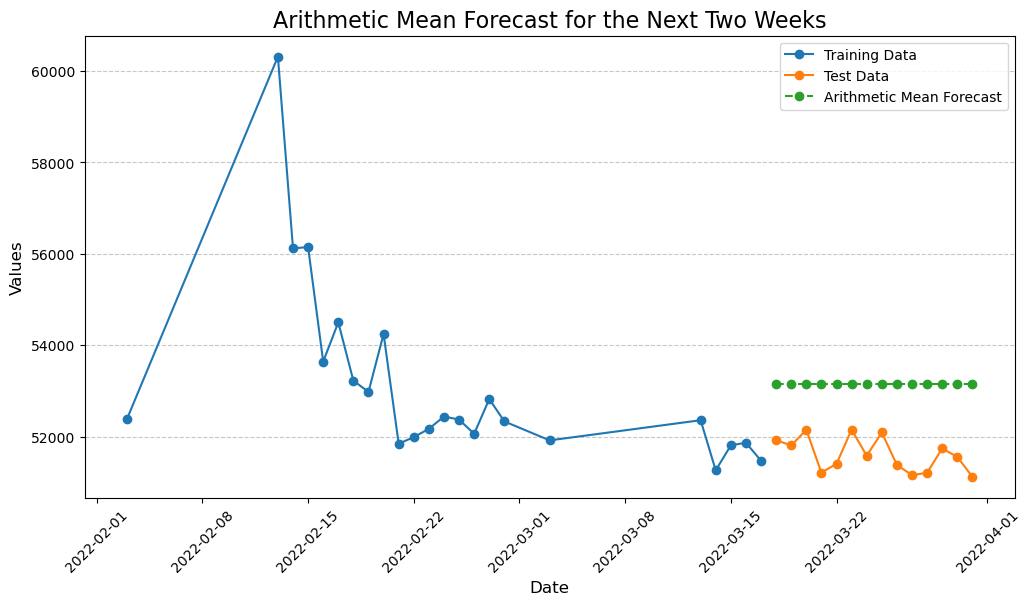

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


train = df_timeseries.iloc[:-14]  
test = df_timeseries.iloc[-14:]  

arithmetic_mean = train['price_x'].mean()

arithmetic_mean_forecast = [arithmetic_mean] * len(test)

mse_arithmetic_mean = mean_squared_error(test['price_x'], arithmetic_mean_forecast)

print(f"Mean Squared Error (MSE) for Arithmetic Mean Forecast: {mse_arithmetic_mean}")

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price_x'], label='Training Data', marker='o')
plt.plot(test.index, test['price_x'], label='Test Data', marker='o')
plt.plot(test.index, arithmetic_mean_forecast, label='Arithmetic Mean Forecast', linestyle='--', marker='o')

plt.title('Arithmetic Mean Forecast for the Next Two Weeks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> Here we have the Arithmetic Mean forecasted values. 

In [23]:
print("Arithmetic Mean Forecasted Values:")
print(arithmetic_mean_forecast)

Arithmetic Mean Forecasted Values:
[53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662]


> ### Naive Forecast 
> 
> The code below is to split the data into train and test, make the forecast for the next 14 days, evaluate the model with Mean Squared Error and plot the results.

The Mean Squared Error (MSE) for the Seasonal Naive Forecast is: 0.0


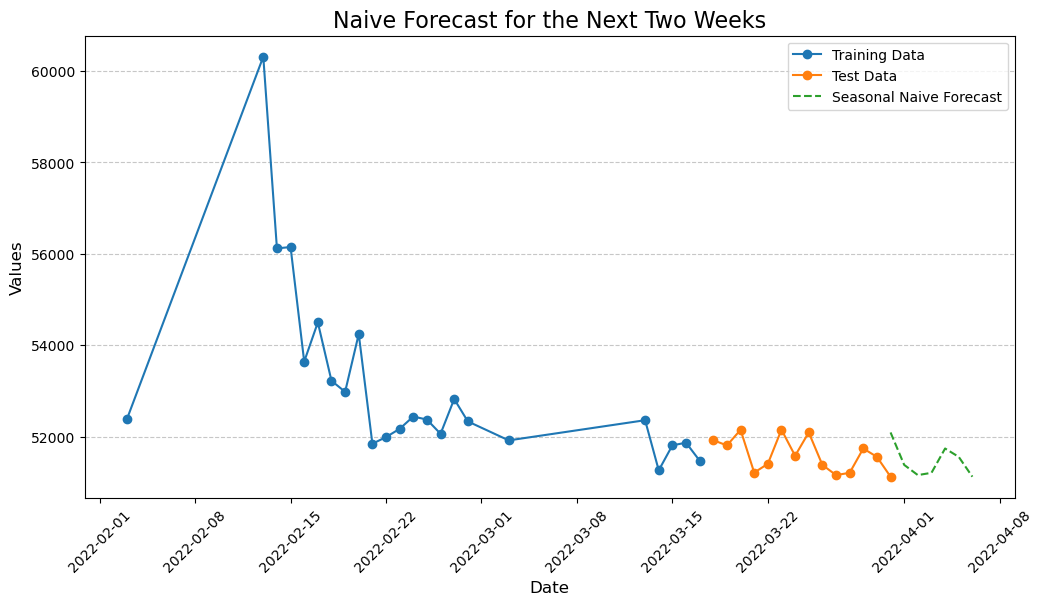

In [24]:
train = df_timeseries.iloc[:-14]  
test = df_timeseries.iloc[-14:]  

season_length = 14
forecast = df_timeseries['price_x'].iloc[-season_length:]

forecast_index = pd.date_range(start=df_timeseries.index[-1], periods=7, freq='D')

mse_seasonal_naive = mean_squared_error(test['price_x'], forecast)
print(f"The Mean Squared Error (MSE) for the Seasonal Naive Forecast is: {mse_seasonal_naive}")

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price_x'], label='Training Data', marker='o')
plt.plot(test.index, test['price_x'], label='Test Data', marker='o')
plt.plot(forecast_index, forecast.values[-7:], label='Seasonal Naive Forecast', linestyle='--')  

plt.title('Naive Forecast for the Next Two Weeks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> The code below shows us the Naive forecasted values.

In [25]:
print("Naive Forecasted Values for the Next Two Weeks:")
print(forecast.values[-14:])

Naive Forecasted Values for the Next Two Weeks:
[51924.13905622 51808.75427996 52150.71969697 51214.29038555
 51406.71378968 52153.94917788 51583.18245614 52092.96870268
 51383.27959184 51160.20809841 51209.79007239 51742.10223464
 51558.7582299  51124.50582011]


> ### ARIMA Model 
>The code below is to import the ARIMA in the library, choose the forecast period (two weeks in this case), apply the model, evaluate the model using Mean Squared Error and plot the results.

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

Mean Squared Error (MSE): 138067.34618518097


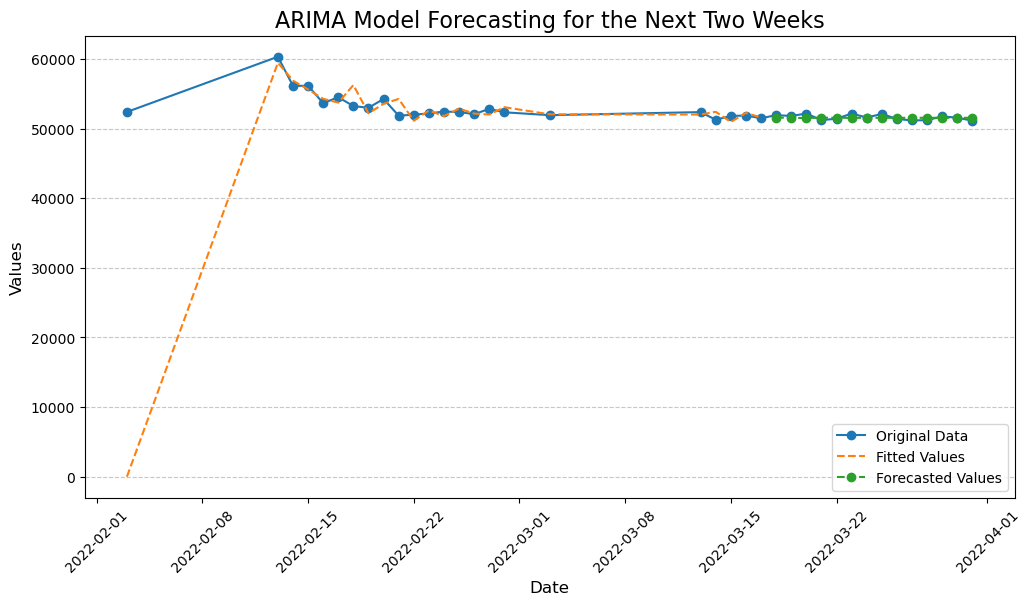

In [26]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd


forecast_period = 14  


train, test = train_test_split(df_timeseries, test_size=forecast_period, shuffle=False)


model = ARIMA(train['price_x'], order=(5, 1, 0))
model_fit = model.fit()


forecast_values = model_fit.forecast(forecast_period)


mse = mean_squared_error(test['price_x'], forecast_values)
print(f"Mean Squared Error (MSE): {mse}")


forecast_index = pd.date_range(start=test.index[0], periods=forecast_period, freq='D')

plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data', marker='o')
plt.plot(model_fit.fittedvalues, label='Fitted Values', linestyle='--')
plt.plot(forecast_index, forecast_values, label='Forecasted Values', linestyle='--', marker='o')

plt.title('ARIMA Model Forecasting for the Next Two Weeks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

> Here we have the forecasted values for two weeks, using ARIMA model.

In [27]:
p = 2  
d = 1  
q = 1 

order = (p, d, q)

model = ARIMA(df_timeseries['price_x'], order=order)
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=14)

print(forecast.predicted_mean)

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-s

37    51927.350076
38    51519.459453
39    51736.349316
40    51621.336659
41    51682.335568
42    51649.984072
43    51667.142082
44    51658.042122
45    51662.868396
46    51660.308723
47    51661.666277
48    51660.946282
49    51661.328140
50    51661.125617
Name: predicted_mean, dtype: float64


C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


> The code below is to show a comparison among the two baseline models (Arithmetic Mean, Naive Forecast) and ARIMA Model. For make this comparison we have got the Mean Squared Error (MSE) of each model and plot them. 


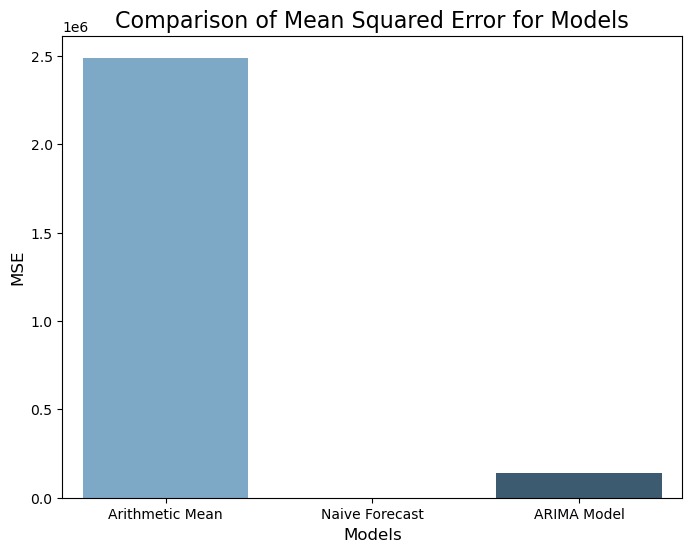

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ["Arithmetic Mean", "Naive Forecast", "ARIMA Model"]

mse_values = [2489954.6100041973, 0.00, 138067.34618518097]  

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=mse_values, palette="Blues_d")
plt.title('Comparison of Mean Squared Error for Models', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()

> If we observe the dataset, we can see some inconsistencies. We have data in 03/02/2022, then we have data from 13/02/22 to 28/02/2022, after that we have data again in 03/03/2022 and then from 13/03/2022 to 31/03/2022. So, in order to explore more Time Series models, we are going to drop the days 03/02/2022 and 03/03/2022. 
>
> The codes below are to see the dataset and then drop those rows. 

In [29]:
df_timeseries.head(40)

,airline,from,time_taken,to,price_x
date,,,,,
2022-02-03,Vistara,Delhi,02h 10m,Mumbai,52384.847236
2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331
2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087
2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397
2022-02-16,Vistara,Delhi,02h 10m,Mumbai,53643.310488
2022-02-17,Air India,Delhi,02h 00m,Mumbai,54501.171604
2022-02-18,Vistara,Delhi,02h 10m,Mumbai,53224.650386
2022-02-19,Vistara,Delhi,02h 10m,Mumbai,52981.195297
2022-02-20,Vistara,Delhi,02h 10m,Mumbai,54247.303856


In [30]:
df_timeseries.drop(pd.to_datetime(['2022-02-03', '2022-03-03']), inplace=True)

In [31]:
df_timeseries.head(40)

,airline,from,time_taken,to,price_x
date,,,,,
2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331
2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087
2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397
2022-02-16,Vistara,Delhi,02h 10m,Mumbai,53643.310488
2022-02-17,Air India,Delhi,02h 00m,Mumbai,54501.171604
2022-02-18,Vistara,Delhi,02h 10m,Mumbai,53224.650386
2022-02-19,Vistara,Delhi,02h 10m,Mumbai,52981.195297
2022-02-20,Vistara,Delhi,02h 10m,Mumbai,54247.303856
2022-02-21,Vistara,Delhi,02h 10m,Mumbai,51845.794695


> ### Seasonal Decomposition and autocorrelation function 

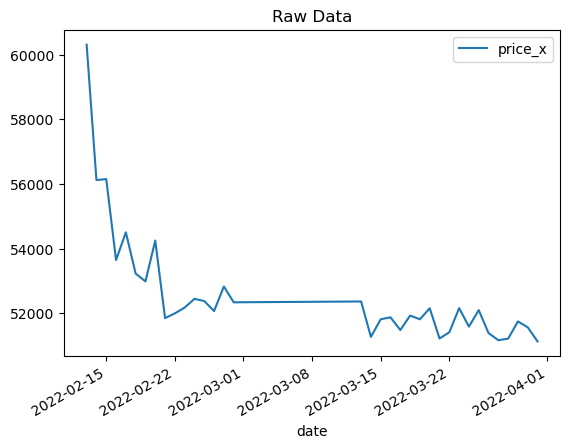

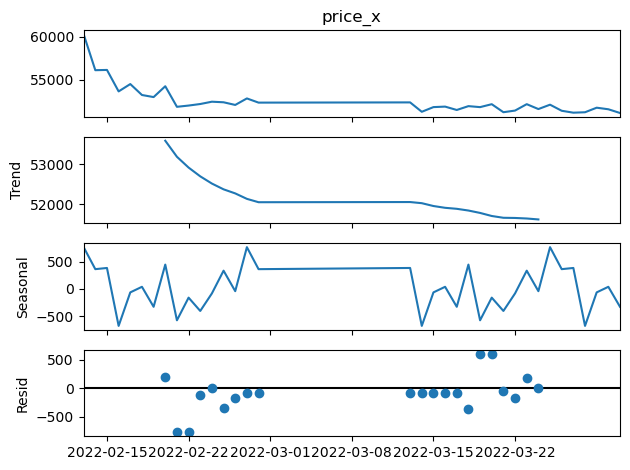

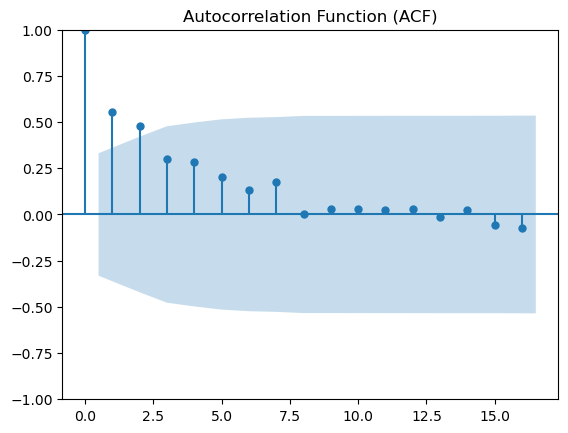

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

df_timeseries = df_timeseries

df_timeseries.plot()
plt.title('Raw Data')
plt.show()

result = seasonal_decompose(df_timeseries['price_x'], model='additive', period=14)

result.plot()
plt.show()

plot_acf(df_timeseries['price_x'])
plt.title('Autocorrelation Function (ACF)')
plt.show()

> ### Exponential Smoothing 

> ##### Simple Exponential Smoothing. 

> The code is to choose the best value of alpha, evaluate the Mean Squared Error, apply the model and plot the results.  

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

The best alpha value for Simple Exponential Smoothing is: 0.8
The Mean Squared Error (MSE) for the best alpha is: 1101141.830229046


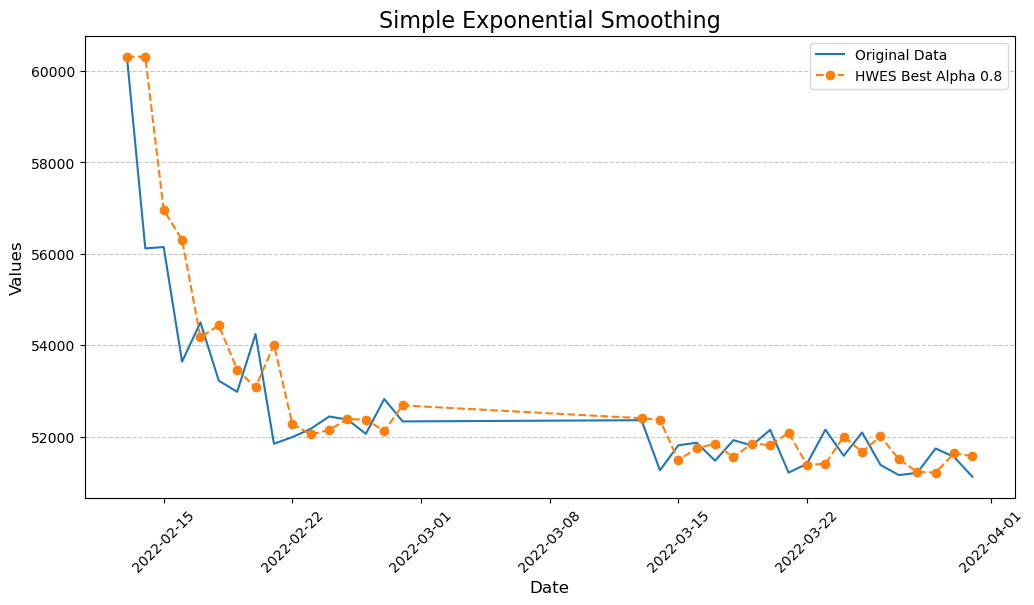

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

alphas = [0.2,0.3, 0.4,0.5, 0.6, 0.7, 0.8, 0.9]

best_alpha = None
min_mse = float('inf')

for alpha in alphas:
    df_timeseries[f'HWES_alpha_{alpha}'] = SimpleExpSmoothing(df_timeseries['price_x']).fit(
        smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues
    mse = mean_squared_error(df_timeseries['price_x'], df_timeseries[f'HWES_alpha_{alpha}'])
    if mse < min_mse:
        min_mse = mse
        best_alpha = alpha

print(f"The best alpha value for Simple Exponential Smoothing is: {best_alpha}")
print(f"The Mean Squared Error (MSE) for the best alpha is: {min_mse}")

plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data')
plt.plot(df_timeseries.index, df_timeseries[f'HWES_alpha_{best_alpha}'], label=f'HWES Best Alpha {best_alpha}', linestyle='--', marker='o')

plt.title('Simple Exponential Smoothing', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> ##### Double Exponential Smoothing 

>The code below is to find the best alpha, to evaluate the models using MSE, to apply the models and to plot them.

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

Mean Squared Error (MSE) for additive trend: 1057211.3347938878


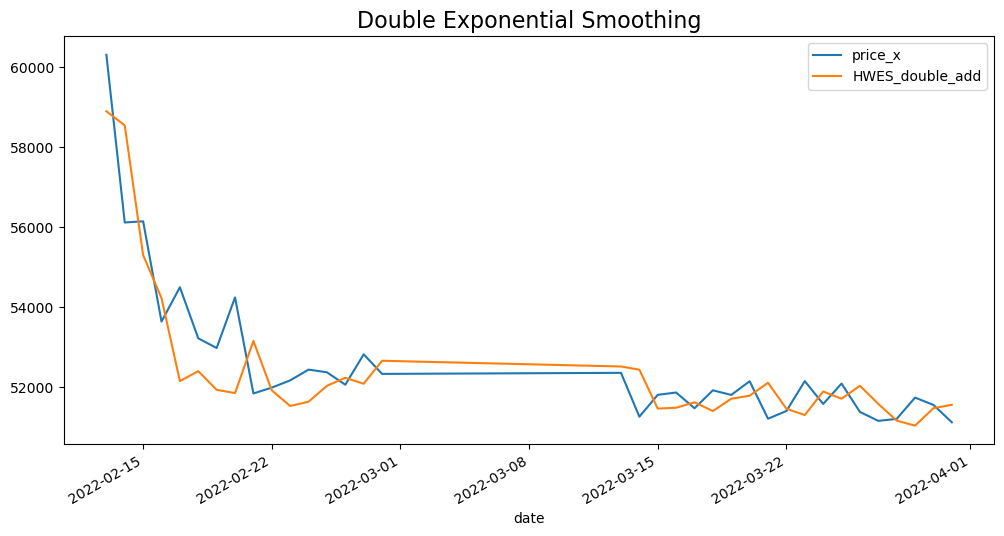

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

alphas_add = [0.2, 0.4, 0.6, 0.8]
mse_scores_add = []

for alpha in alphas_add:
    model_add_alpha = ExponentialSmoothing(df_timeseries['price_x'], trend='add')
    fit_add_alpha = model_add_alpha.fit(smoothing_level=alpha)
    fitted_values_add = fit_add_alpha.fittedvalues
    mse_add = mean_squared_error(df_timeseries['price_x'], fitted_values_add)
    mse_scores_add.append(mse_add)

avg_mse_add = sum(mse_scores_add) / len(mse_scores_add)

print(f"Mean Squared Error (MSE) for additive trend: {avg_mse_add}")

best_alpha_add = alphas_add[mse_scores_add.index(min(mse_scores_add))]

model_best_alpha_add = ExponentialSmoothing(df_timeseries['price_x'], trend='add')
fit_best_alpha_add = model_best_alpha_add.fit(smoothing_level=best_alpha_add)
df_timeseries['HWES_double_add'] = fit_best_alpha_add.fittedvalues

ax = df_timeseries[['price_x', 'HWES_double_add']].plot(title='Double Exponential Smoothing', figsize=(12, 6))
ax.set_title('Double Exponential Smoothing', fontsize=16)  # Set the title fontsize to 16
plt.legend(loc='upper right')
plt.show()


> #### Triple Exponential Smoothing 

> The code is to choose the best alpha, apply the model with 14 days for seasonality, and plot it. 


C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\jujub\anaconda3\anacon

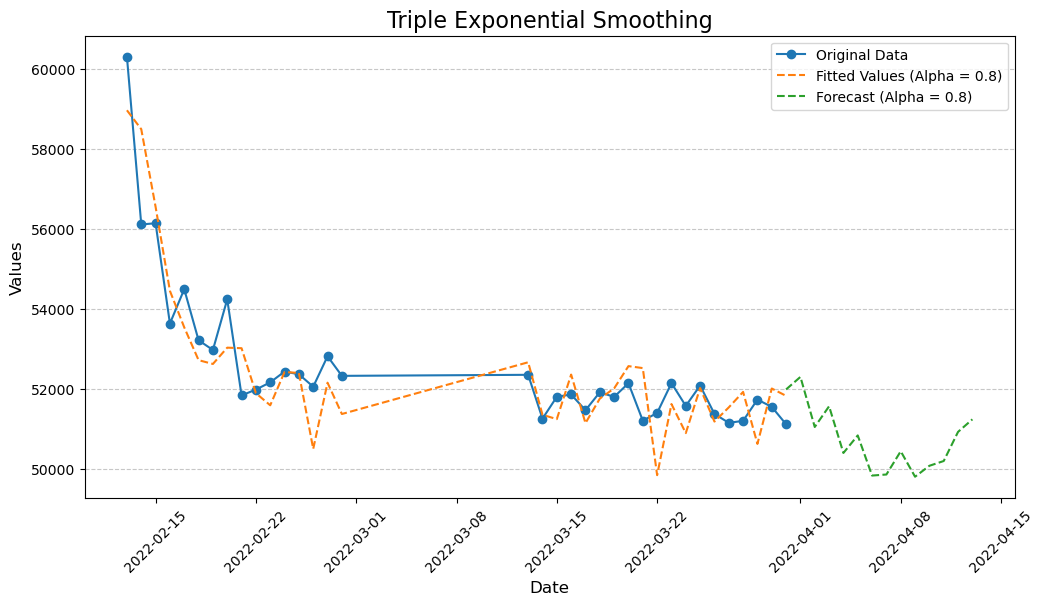

In [35]:
alphas = [0.2, 0.4, 0.6, 0.8]

mse_scores = []

for alpha in alphas:
    model = ExponentialSmoothing(df_timeseries['price_x'], trend='add', seasonal='add', seasonal_periods=12)
    fit = model.fit(smoothing_level=alpha)
    fitted_values = fit.fittedvalues
    mse = mean_squared_error(df_timeseries['price_x'], fitted_values)
    mse_scores.append(mse)
        
best_alpha = alphas[mse_scores.index(min(mse_scores))]

model = ExponentialSmoothing(df_timeseries['price_x'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit(smoothing_level=best_alpha)
fitted_values = fit.fittedvalues
forecast = fit.forecast(steps=14)

plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data', marker='o')
plt.plot(df_timeseries.index, fitted_values, label=f'Fitted Values (Alpha = {best_alpha})', linestyle='--')
plt.plot(pd.date_range(start=df_timeseries.index[-1], periods=14, freq='D'), forecast, label=f'Forecast (Alpha = {best_alpha})', linestyle='--')
plt.title('Triple Exponential Smoothing', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


> ### Exponential Smoothing models comparison 

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


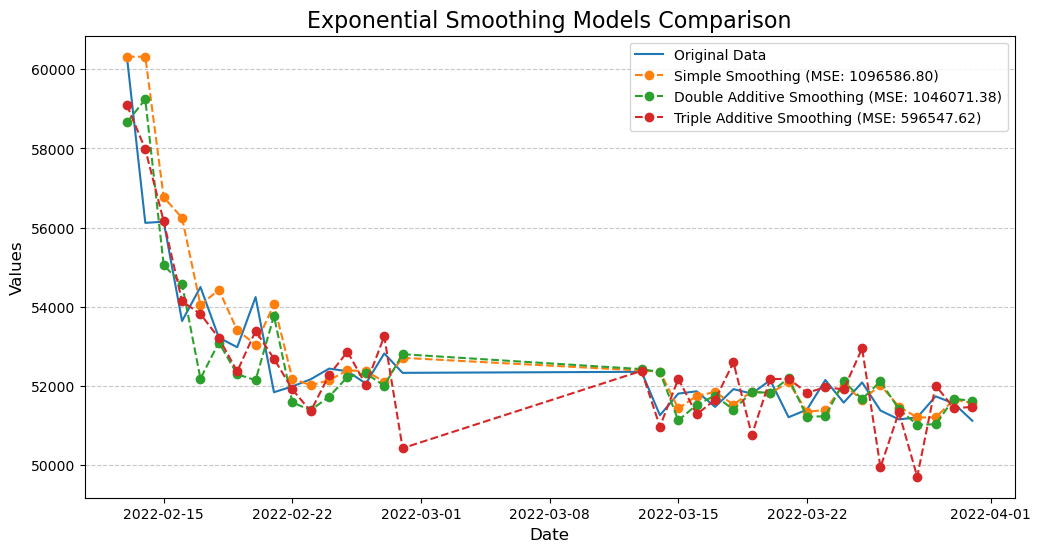

In [36]:
model_ses = SimpleExpSmoothing(df_timeseries['price_x'])
fit_ses = model_ses.fit()
fitted_values_ses = fit_ses.fittedvalues
mse_ses = mean_squared_error(df_timeseries['price_x'], fitted_values_ses)

model_des_add = ExponentialSmoothing(df_timeseries['price_x'], trend='add')
fit_des_add = model_des_add.fit(smoothing_level=best_alpha)  
fitted_values_des_add = fit_des_add.fittedvalues
mse_des_add = mean_squared_error(df_timeseries['price_x'], fitted_values_des_add)

model_tes_add = ExponentialSmoothing(df_timeseries['price_x'], 
                                    trend='add', seasonal='add', seasonal_periods=14)
fit_tes_add = model_tes_add.fit(smoothing_level=best_alpha)  
fitted_values_tes_add = fit_tes_add.fittedvalues
mse_tes_add = mean_squared_error(df_timeseries['price_x'], fitted_values_tes_add)

plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data')
plt.plot(df_timeseries.index, fitted_values_ses, label=f'Simple Smoothing (MSE: {mse_ses:.2f})', linestyle='--', marker='o')
plt.plot(df_timeseries.index, fitted_values_des_add, label=f'Double Additive Smoothing (MSE: {mse_des_add:.2f})', linestyle='--', marker='o')
plt.plot(df_timeseries.index, fitted_values_tes_add, label=f'Triple Additive Smoothing (MSE: {mse_tes_add:.2f})', linestyle='--', marker='o')

plt.title('Exponential Smoothing Models Comparison', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> ### Supervised Models  



In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df = pd.read_csv('business.csv')

In [42]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,23:55,Mumbai,"46,690"


In [43]:
df.shape

(93487, 11)

In [44]:
df.duplicated().sum()

0

In [45]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64


> In this second approach we decided to keep the 'stop' column and impute numerical values, as we know that there is a considerable correlation between the number of stops and the price. Our data set in that part will be called as df2.



In [46]:
df2 = df.drop(['ch_code', 'num_code', 'dep_time', 'arr_time'], axis=1)

In [47]:
value_counts = df2['stop'].value_counts()
print(value_counts)

1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t                   81489
non-stop                                                                          8102
2+-stop                                                                           1083
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\r\n\t\t\t\t\t\t\t\t\t\t\t\t              810
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\r\n\t\t\t\t\t\t\t\t\t\t\t\t              776
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\r\n\t\t\t\t\t\t\t\t\t\t\t\t              257
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\r\n\t\t\t\t\t\t\t\t\t\t\t\t            242
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\r\n\t\t\t\t\t\t\t\t\t\t\t\t              152
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\r\n\t\t\t\t\t\t\t\t\t\t\t\t               93
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\r\n\t\t\t\t\t\t\t\t\t\t\t\t               86
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\r\n\t\t\t\t\t\t\t\t\t\t\t\t       75
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyder

In [48]:
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("non-stop","0", regex=True)
df2["stop"]=df2["stop"].replace("2+-stop","2", regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\r\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\r\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\r\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True) 
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)            
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolkata\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)           
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)               
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)           
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)                
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)               
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)              
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia HYD\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)               

In [49]:
df2

,date,airline,from,time_taken,stop,to,price
0,11-02-2022,Air India,Delhi,02h 00m,0,Mumbai,"25,612"
1,11-02-2022,Air India,Delhi,02h 15m,0,Mumbai,"25,612"
2,11-02-2022,Air India,Delhi,24h 45m,1,Mumbai,"42,220"
3,11-02-2022,Air India,Delhi,26h 30m,1,Mumbai,"44,450"
4,11-02-2022,Air India,Delhi,06h 40m,1,Mumbai,"46,690"
...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,Chennai,10h 05m,1,Hyderabad,"69,265"
93483,31-03-2022,Vistara,Chennai,10h 25m,1,Hyderabad,"77,105"
93484,31-03-2022,Vistara,Chennai,13h 50m,1,Hyderabad,"79,099"
93485,31-03-2022,Vistara,Chennai,10h 00m,1,Hyderabad,"81,585"


> Same as we have done in the first approach - price column has object values and need to be replaced it as integers values. We will apply the function str.replace to do that below


In [50]:
# Remove non-numeric characters from the 'price' column
df2['price'] = df2['price'].str.replace(',', '').astype(float)

# Print the DataFrame with the converted 'price' column
df2.head()

,date,airline,from,time_taken,stop,to,price
0,11-02-2022,Air India,Delhi,02h 00m,0,Mumbai,25612.0
1,11-02-2022,Air India,Delhi,02h 15m,0,Mumbai,25612.0
2,11-02-2022,Air India,Delhi,24h 45m,1,Mumbai,42220.0
3,11-02-2022,Air India,Delhi,26h 30m,1,Mumbai,44450.0
4,11-02-2022,Air India,Delhi,06h 40m,1,Mumbai,46690.0


> Our next step is convert remaining "categorical" values to "numerical" values



In [51]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [52]:
df2["airline"] = lab_enc.fit_transform(df2["airline"])
df2["from"] = lab_enc.fit_transform(df2["from"])
df2["to"] = lab_enc.fit_transform(df2["to"])
df2["date"] = lab_enc.fit_transform(df2["date"])

In [53]:
df2

,date,airline,from,time_taken,stop,to,price
0,10,0,2,02h 00m,0,5,25612.0
1,10,0,2,02h 15m,0,5,25612.0
2,10,0,2,24h 45m,1,5,42220.0
3,10,0,2,26h 30m,1,5,44450.0
4,10,0,2,06h 40m,1,5,46690.0
...,...,...,...,...,...,...,...
93482,48,1,1,10h 05m,1,3,69265.0
93483,48,1,1,10h 25m,1,3,77105.0
93484,48,1,1,13h 50m,1,3,79099.0
93485,48,1,1,10h 00m,1,3,81585.0


> ### Random Forest Regressor 

> The following codes will firstly converts a 'date' column to a datetime format for potential date-related operations. Subsequently, categorical variables like 'airline', 'from', 'stop', and 'to' are encoded into numerical values using the LabelEncoder. The dataset is then divided into features (X) and the target variable (y), with X encompassing the encoded categorical columns and y representing the 'price' column. Finally, the data is split into training and testing sets for subsequent machine learning model development and evaluation.


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert date to datetime
df2['date'] = pd.to_datetime(df2['date'])

# Encode categorical variables
label_encoder = LabelEncoder()
df2['airline'] = label_encoder.fit_transform(df2['airline'])
df2['from'] = label_encoder.fit_transform(df2['from'])
df2['stop'] = label_encoder.fit_transform(df2['stop'])
df2['to'] = label_encoder.fit_transform(df2['to'])

# Split data into features (X) and target (y)
X = df2[['airline', 'from', 'stop', 'to']]
y = df2['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict prices on the test set
y_pred = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2}')


Mean Absolute Error: 5430.145060494133
Mean Squared Error: 61844555.60866476
R-squared: 0.6343014844962763


##### MAKE PREDICTION

In [57]:
# Example prediction
rf_data = [[5, 2, 0, 3]]  
predicted_price = model_rf.predict(rf_data)
print(f'Random Forest Regressor Predicted Price: {predicted_price[0]}')

Random Forest Regressor Predicted Price: 24582.110756322512


C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


> ### Support Vector Regression (SVR) 

In [58]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df2[['from', 'stop', 'to']] = scaler.fit_transform(df2[['from', 'stop', 'to']])

In [59]:
from sklearn.svm import SVR

# Initialize the SVR model
model_svr = SVR(kernel='rbf')  # You can try different kernels ('linear', 'poly', etc.)

# Train the model
model_svr.fit(X_train, y_train)

SVR()

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict prices on the test set
y_pred_svr = model_svr.predict(X_test)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR Mean Absolute Error: {mae_svr}')
print(f'SVR Mean Squared Error: {mse_svr}')
print(f'SVR R-squared: {r2_svr}')


SVR Mean Absolute Error: 9445.883310776953
SVR Mean Squared Error: 164142816.1510493
SVR R-squared: 0.029392585874943644


##### MAKE PREDICTION

In [61]:
srv_data = [[5, 2, 0, 3]]
predicted_price_svr = model_svr.predict(srv_data)
print(f'SVR Predicted Price: {predicted_price_svr[0]}')

SVR Predicted Price: 54253.60417270623


C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


> ### XGBoost 

In [62]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
model_xgb = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [63]:
# Predict prices on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Absolute Error: {mae_xgb}')
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')

XGBoost Mean Absolute Error: 5428.5819578171795
XGBoost Mean Squared Error: 61816545.811112516
XGBoost R-squared: 0.634467111709272


> ### K-Nearest Neighbors Regressor

In [64]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the K-Nearest Neighbors model
model_knn = KNeighborsRegressor(n_neighbors=5) 

# Train the model
model_knn.fit(X_train, y_train)


KNeighborsRegressor()

In [65]:
# Assuming you have already trained the K-Nearest Neighbors Regressor model (model_knn) and have the test set (X_test, y_test)

# Predict prices on the test set
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'K-Nearest Neighbors Mean Absolute Error: {mae_knn}')
print(f'K-Nearest Neighbors Mean Squared Error: {mse_knn}')
print(f'K-Nearest Neighbors R-squared: {r2_knn}')

K-Nearest Neighbors Mean Absolute Error: 6346.67248903626
K-Nearest Neighbors Mean Squared Error: 77744342.70520698
K-Nearest Neighbors R-squared: 0.5402830461583331


##### MAKE PREDICTION

In [66]:
knn_data = [[5, 2, 0, 3]]
predicted_price_knn = model_knn.predict(knn_data)
print(f'KNN Predicted Price: {predicted_price_knn[0]}')

KNN Predicted Price: 24504.0


C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


> ### Linear Regression 

In [67]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df2['airline_code'] = label_encoder.fit_transform(df2['airline'])
df2['from_code'] = label_encoder.fit_transform(df2['from'])
df2['to_code'] = label_encoder.fit_transform(df2['to'])

In [68]:
# Define Features (X) and Target (y)
features = ['airline_code', 'from_code', 'to_code', 'stop']
X = df2[features]
y = df2['price']

In [69]:
from sklearn.model_selection import train_test_split

#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

LinearRegression()

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict prices on the test set
y_pred = model_lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 9209.6822570692
Mean Squared Error: 147513726.99784905
R-squared: 0.12772352475313298


##### MAKE PREDICTION

In [72]:
data_lr = [[5, 2, 0, 3]]  
predicted_price = model_lr.predict(data_lr)
print(f'Linear Regression Predicted Price: {predicted_price[0]}')

Linear Regression Predicted Price: 95683.5790072981


C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


> ### Comparing Supervised Models 

In [73]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Initialize models
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_svr = SVR(kernel='rbf')
model_lr = LinearRegression()
model_xgb = XGBRegressor(n_estimators=100, random_state=42)
model_knn = KNeighborsRegressor(n_neighbors=5)

# List of models for iteration
models = [model_rf,model_svr,model_lr,model_xgb,model_knn]
model_names = ['Random Forest', 'SVR', 'Linear Regression', 'XGBoost', 'KNN']

# Train and evaluate models
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Metrics for {name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("-" * 30)


Metrics for Random Forest:
Mean Absolute Error: 5430.145060494133
Mean Squared Error: 61844555.60866476
R-squared: 0.6343014844962763
------------------------------
Metrics for SVR:
Mean Absolute Error: 9440.755365049125
Mean Squared Error: 165081272.04563275
R-squared: 0.023843319263885387
------------------------------
Metrics for Linear Regression:
Mean Absolute Error: 9209.6822570692
Mean Squared Error: 147513726.99784905
R-squared: 0.12772352475313298
------------------------------
Metrics for XGBoost:
Mean Absolute Error: 5428.5819578171795
Mean Squared Error: 61816545.811112516
R-squared: 0.634467111709272
------------------------------
Metrics for KNN:
Mean Absolute Error: 6452.183495561023
Mean Squared Error: 78602974.81543054
R-squared: 0.535205792631612
------------------------------


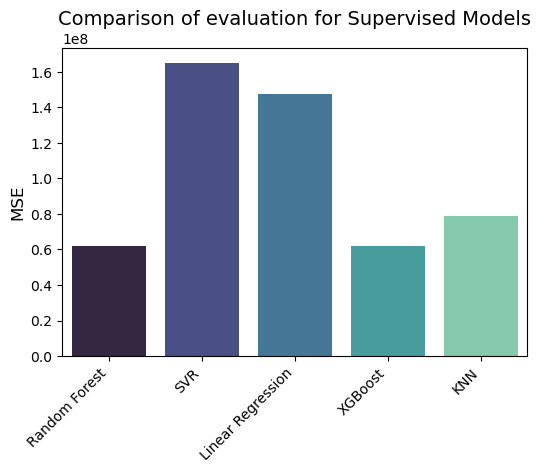

In [74]:
model_names = ["Random Forest", "SVR",
              "Linear Regression", "XGBoost", "KNN"]

mse_values = [61844555.60866476, 165081272.04563275, 147513726.99784905, 61824848.74410443, 78602974.81543054]  

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=model_names, y=mse_values, palette="mako")
plt.title('Comparison of evaluation for Supervised Models', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('MSE', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.show()

> ### Comparing Unsupervised Models 

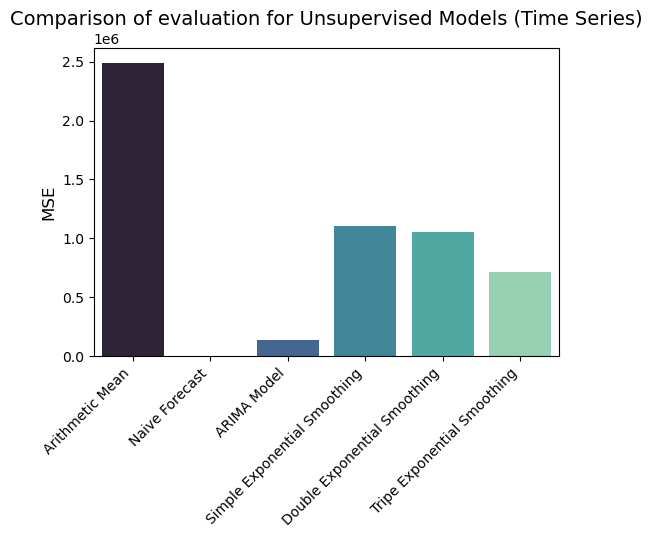

In [75]:
model_names = ["Arithmetic Mean", "Naive Forecast", "ARIMA Model", "Simple Exponential Smoothing",
              "Double Exponential Smoothing", "Tripe Exponential Smoothing"]

mse_values = [2489954.6100041973, 0.00, 138067.34618518097, 1101141.830229046, 1057211.3347938878, 717122.22]  


plt.figure(figsize=(6, 4))
ax = sns.barplot(x=model_names, y=mse_values, palette="mako")
plt.title('Comparison of evaluation for Unsupervised Models (Time Series)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('MSE', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.show()

> ### Comparing the best two models 

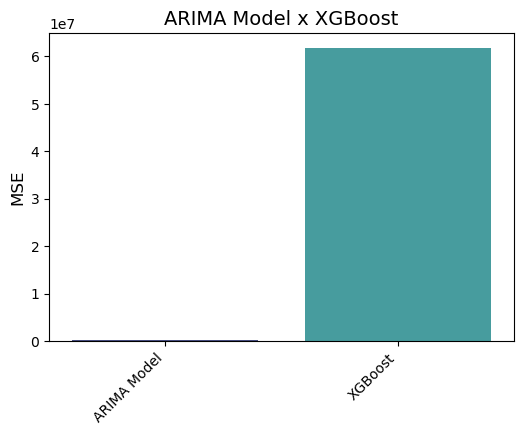

In [76]:
model_names = ["ARIMA Model", "XGBoost"]

mse_values = [138067.34618518097, 61824848.74410443]  

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=model_names, y=mse_values, palette="mako")
plt.title('ARIMA Model x XGBoost', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('MSE', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.show()

> ### Contribution of each team member in the Project 

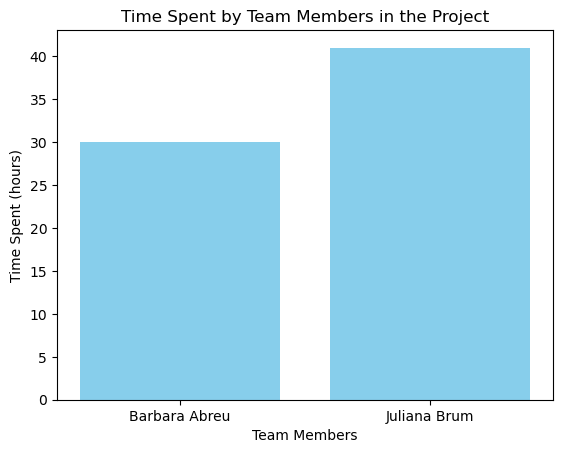

In [77]:
Team_members = ["Barbara Abreu", "Juliana Brum"]

Time_spent_hours = [30, 41]

plt.bar(Team_members, Time_spent_hours, color='skyblue')
plt.xlabel('Team Members')
plt.ylabel('Time Spent (hours)')
plt.title('Time Spent by Team Members in the Project')
plt.show()

> ### References 

> AI, T. (2022). Working with Indexes in Time Series. [online] Medium. Available at: [https://levelup.gitconnected.com/working-with-indexes-in-time-series-a2e00d220399](https://levelup.gitconnected.com/working-with-indexes-in-time-series-a2e00d220399) [Accessed 26 Oct. 2023].
> 
> Altman, N. S. (1992). An introduction to kernel and nearest-neighbor nonparametric regression. The American Statistician, 46(3), 175-185. [online] Available at: [https://www.semanticscholar.org/paper/An-Introduction-to-Kernel-and-Nearest-Neighbor-Altman](https://www.semanticscholar.org/paper/An-Introduction-to-Kernel-and-Nearest-Neighbor-Altman)
>
> Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32. [online] Available at: [https://link.springer.com/article/10.1023/A:1010933404324](https://link.springer.com/article/10.1023/A:1010933404324)
>
> Brownlee, J. (2017). How to Decompose Time Series Data into Trend and Seasonality. [online] Machine Learning Mastery. Available at: [https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/).
>
> Brownlee, J. (2019). A Gentle Introduction to Exponential Smoothing for Time Series Forecasting in Python. [online] Machine Learning Mastery. Available at: [https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/](https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/)
>
> Chen, B. (2020). Pandas resample() tricks you should know for manipulating time-series data. [online] Medium. Available at: [https://towardsdatascience.com/pandas-resample-tricks-you-should-know-for-manipulating-time-series-data-7e9643a7e7f3](https://towardsdatascience.com/pandas-resample-tricks-you-should-know-for-manipulating-time-series-data-7e9643a7e7f3) [Accessed 26 Oct. 2023].
>
> Drucker, H., Burges, C. J., Kaufman, L., Smola, A. J., & Vapnik, V. (1996). Support vector regression machines. Advances in neural information processing systems, 9. [online] Available at: [https://proceedings.neurips.cc/paper_files/paper/1996/file/d38901788c533e8286cb6400b40b386d-Paper.pdf](https://proceedings.neurips.cc/paper_files/paper/1996/file/d38901788c533e8286cb6400b40b386d-Paper.pdf)
>
> Frost, J. (2021a). Exponential Smoothing for Time Series Forecasting. [online] Statistics By Jim. Available at: [https://statisticsbyjim.com/time-series/exponential-smoothing-time-series-forecasting/](https://statisticsbyjim.com/time-series/exponential-smoothing-time-series-forecasting/).
>
> Hackr.io. (n.d.). Pandas Drop Column Method For Data Cleaning. [online] Available at: [https://hackr.io/blog/pandas-drop-column-method-for-data-cleaning#:~:text=Why%20Should%20You%20Drop%20Columns%3F%20Dropping%20columns%20is.](https://hackr.io/blog/pandas-drop-column-method-for-data-cleaning#:~:text=Why%20Should%20You%20Drop%20Columns%3F%20Dropping%20columns%20is.)
>
> Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning (Vol. 2). Springer. [online] Available at: [https://link.springer.com/book/10.1007/978-0-387-84858-7](https://link.springer.com/book/10.1007/978-0-387-84858-7)
>
> Healey, C. G., & Enns, J. T. (2012). Attention and visual memory in visualization and computer graphics. IEEE Transactions on Visualization and Computer Graphics, 18(7), 1170-1188. [online] Available at: [https://ieeexplore.ieee.org/document/5963660](https://ieeexplore.ieee.org/document/5963660)
>
> Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice. OTexts. [online] Available at: [https://otexts.com/fpp3/](https://otexts.com/fpp3/)
>
> Lipton, Z. C. (2016). The Mythos of Model Interpretability. arXiv preprint arXiv:1606.03490. [online] Available at: [https://arxiv.org/pdf/1606.03490.pdf](https://arxiv.org/pdf/1606.03490.pdf)
>
> parthmanchanda81 (2021). Libraries in Python. [online] GeeksforGeeks. Available at: [https://www.geeksforgeeks.org/libraries-in-python/](https://www.geeksforgeeks.org/libraries-in-python/).
>
> Prabhakaran, S. (2021). ARIMA Model - Complete Guide to Time Series Forecasting in Python | ML+. [online] Machine Learning Plus. Available at: [https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/?utm_content=cmp-true](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/?utm_content=cmp-true).
>
> Sennikova, T. (2020). How to Build a Baseline Model. [online] Medium. Available at: [https://towardsdatascience.com/how-to-build-a-baseline-model-be6ce42389fc](https://towardsdatascience.com/how-to-build-a-baseline-model-be6ce42389fc) [Accessed 26 Oct. 2023].
>
> Verma, Y. (2021). Complete Guide To Dickey-Fuller Test In Time-Series Analysis. [online] Analytics India Magazine. Available at: [https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/](https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/).
